In [1]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2685f597-f088-4dd6-876e-b4a85191119b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2025-07-04T18:25:48.208Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 9490}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12238, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [8]:
df= pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12238,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.988752e+07,1.988752e+07,False,NaN,1,NaN,NaN,None,2025-07-04T18:25:00.000Z,107742.015934,4.313833e+10,-21.1365,-0.104369,-1.605538,0.791825,2.424597,13.893091,29.892741,2.142721e+12,64.6946,2.262582e+12,None,2025-07-04T18:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-05 01:54:56.154423
1,1027,Ethereum,ETH,ethereum,10368,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207171e+08,1.207171e+08,True,NaN,2,NaN,NaN,None,2025-07-04T18:25:00.000Z,2487.231970,1.692906e+10,-31.1072,-0.167971,-3.678529,3.460400,-5.706634,37.014069,38.942461,3.002514e+11,9.0654,3.002514e+11,None,2025-07-04T18:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-05 01:54:56.154423
2,825,Tether USDt,USDT,tether,135256,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.584235e+11,1.608224e+11,True,NaN,3,NaN,NaN,None,2025-07-04T18:24:00.000Z,1.000262,6.165383e+10,-26.7261,-0.001977,-0.010549,-0.016359,-0.005206,0.030014,0.061630,1.584650e+11,4.7845,1.608645e+11,None,2025-07-04T18:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-05 01:54:56.154423
3,52,XRP,XRP,xrp,1640,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.906819e+10,9.998597e+10,False,NaN,4,NaN,NaN,None,2025-07-04T18:24:00.000Z,2.217959,2.208308e+09,-46.9688,-0.049275,-2.060442,6.147025,-0.614817,3.282244,3.970021,1.310108e+11,3.9556,2.217959e+11,None,2025-07-04T18:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-05 01:54:56.154423
4,1839,BNB,BNB,bnb,2600,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408852e+08,1.408852e+08,False,NaN,5,NaN,NaN,None,2025-07-04T18:25:00.000Z,652.474700,1.402411e+09,-9.1725,-0.019863,-1.060199,1.313423,-2.356308,8.983498,10.092146,9.192406e+10,2.7754,9.192406e+10,None,2025-07-04T18:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-05 01:54:56.154423
5,5426,Solana,SOL,solana,944,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.347300e+08,6.044509e+08,True,NaN,6,5.252369e+08,7.686085e+10,None,2025-07-04T18:25:00.000Z,146.335598,3.540858e+09,-11.3851,0.292460,-3.167653,3.495154,-6.400294,0.317663,23.664143,7.825004e+10,2.3626,8.845269e+10,None,2025-07-04T18:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-05 01:54:56.154423
6,3408,USDC,USDC,usd-coin,29060,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.218842e+10,6.218842e+10,False,NaN,7,6.090122e+10,6.089810e+10,None,2025-07-04T18:25:00.000Z,0.999949,7.742035e+09,-30.7352,-0.008493,0.016441,0.000575,0.027011,-0.013110,-0.005413,6.218524e+10,1.8775,6.218524e+10,None,2025-07-04T18:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-05 01:54:56.154423
7,1958,TRON,TRX,tron,1194,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.478379e+10,9.478380e+10,True,NaN,8,7.165966e+10,2.032818e+10,None,2025-07-04T18:25:00.000Z,0.283677,4.402351e+08,-14.9254,0.207040,-0.887511,4.312875,3.635879,13.929020,19.413716,2.688795e+10,0.8118,2.688796e+10,None,2025-07-04T18:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-05 01:54:56.154423
8,74,Dogecoin,DOGE,dogecoin,1246,2013-12-15T00:00:00.000Z,"[mineable, pow,

In [56]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2685f597-f088-4dd6-876e-b4a85191119b',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2= pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2])
    
    #df= pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    #if not os.path.isfile(r'C:\Users\ammut\Desktop\Summer2025\Intern Prep\DA\PROJ7\API2.csv'):
     #   df.to_csv(r'C:\Users\ammut\Desktop\Summer2025\Intern Prep\DA\PROJ7\API2.csv')
    #else:
     #   df.to_csv(r'C:\Users\ammut\Desktop\Summer2025\Intern Prep\DA\PROJ7\API2.csv', mode = 'a', header=False)
        

In [57]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(15)
exit()

{'status': {'timestamp': '2025-06-14T13:55:04.273Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9645}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12214, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12214,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987800e+07,1.987800e+07,...,63.7741,2.204702e+12,None,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
1,1027,Ethereum,ETH,ethereum,10341,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207212e+08,1.207212e+08,...,9.3417,3.056935e+11,None,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
2,825,Tether USDt,USDT,tether,132727,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.554693e+11,1.570037e+11,...,4.7531,1.570733e+11,None,2025-06-14T12:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-14 18:25:04.944137
3,52,XRP,XRP,xrp,1625,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.888176e+10,9.998604e+10,...,3.9045,2.169901e+11,None,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
4,1839,BNB,BNB,bnb,2581,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408865e+08,1.408865e+08,...,2.7985,9.157516e+10,None,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
5,5426,Solana,SOL,solana,936,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.276290e+08,6.029968e+08,...,2.3463,8.774579e+10,None,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
6,3408,USDC,USDC,usd-coin,28650,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.169090e+10,6.169090e+10,...,1.8852,6.169065e+10,None,2025-06-14T12:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-14 18:25:04.944137
7,74,Dogecoin,DOGE,dogecoin,1235,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.496820e+11,1.496820e+11,...,0.8106,2.652441e+10,None,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
8,1958,TRON,TRX,tron,1186,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.483950e+10,9.483951e+10,...,0.7817,2.557930e+10,None,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
9,2010,Cardano,ADA,cardano,1529,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.535654e+10,4.499499e+10,...,0.6847,2.851659e+10,None,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137


In [19]:
df3 = pd.read_csv(r'C:\Users\ammut\Desktop\Summer2025\Intern Prep\DA\PROJ7\API2.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12214,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.987800e+07,...,63.7741,2.204702e+12,NaN,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
1,1,1027,Ethereum,ETH,ethereum,10341,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207212e+08,...,9.3417,3.056935e+11,NaN,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
2,2,825,Tether USDt,USDT,tether,132727,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.554693e+11,...,4.7531,1.570733e+11,NaN,2025-06-14T12:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-14 18:25:04.944137
3,3,52,XRP,XRP,xrp,1625,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.888176e+10,...,3.9045,2.169901e+11,NaN,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
4,4,1839,BNB,BNB,bnb,2581,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.408865e+08,...,2.7985,9.157516e+10,NaN,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
5,5,5426,Solana,SOL,solana,936,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.276290e+08,...,2.3463,8.774579e+10,NaN,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
6,6,3408,USDC,USDC,usd-coin,28650,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,6.169090e+10,...,1.8852,6.169065e+10,NaN,2025-06-14T12:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-14 18:25:04.944137
7,7,74,Dogecoin,DOGE,dogecoin,1235,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.496820e+11,...,0.8106,2.652441e+10,NaN,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
8,8,1958,TRON,TRX,tron,1186,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.483950e+10,...,0.7817,2.557930e+10,NaN,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
9,9,2010,Cardano,ADA,cardano,1529,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.535654e+10,...,0.6847,2.851659e+10,NaN,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137


In [20]:
 pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [25]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12214,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19878000.00000,19878000.00000,False,NaN,1,NaN,NaN,None,2025-06-14T12:25:00.000Z,104985.83165,46379352185.04162,-35.73770,-0.11560,-0.10753,-0.33101,2.37280,22.77275,27.08135,2086908361559.18970,63.77410,2204702464671.64990,None,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
1,1027,Ethereum,ETH,ethereum,10341,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120721164.04616,120721164.04616,True,NaN,2,NaN,NaN,None,2025-06-14T12:25:00.000Z,2532.22800,19588918969.17892,-50.95460,-0.23622,-0.80733,1.33221,-0.88427,55.19934,34.81425,305693512246.17371,9.34170,305693512246.16998,None,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
2,825,Tether USDt,USDT,tether,132727,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,155469346382.92398,157003724943.10956,True,NaN,3,NaN,NaN,None,2025-06-14T12:24:00.000Z,1.00044,64032286609.56618,-46.06140,-0.00051,0.00409,-0.01421,0.03512,0.05547,0.04770,155538270192.78015,4.75310,157073328984.91000,None,2025-06-14T12:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-14 18:25:04.944137
3,52,XRP,XRP,xrp,1625,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58881764070.00000,99986037638.00000,False,NaN,4,NaN,NaN,None,2025-06-14T12:25:00.000Z,2.16990,2383927772.56107,-46.45850,-0.17139,0.60963,-0.80878,-12.24113,0.50862,-6.06593,127767607357.69914,3.90450,216990114640.26001,None,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
4,1839,BNB,BNB,bnb,2581,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140886522.42000,140886522.42000,False,NaN,5,NaN,NaN,None,2025-06-14T12:25:00.000Z,649.99234,1394570398.90563,-32.41600,-0.14104,-0.51590,0.11250,-0.66359,10.49765,9.01402,91575160648.58565,2.79850,91575160648.59000,None,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
5,5426,Solana,SOL,solana,936,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,527628995.69437,602996825.99118,True,NaN,6,525236893.30000,76430464562.77634,None,2025-06-14T12:25:00.000Z,145.51618,3213618316.42995,-47.87460,-0.36320,-0.13546,-4.18138,-15.03868,10.16128,11.85778,76778554157.42462,2.34630,87745792666.67000,None,2025-06-14T12:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-14 18:25:04.944137
6,3408,USDC,USDC,usd-coin,28650,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61690900479.13792,61690900479.13792,False,NaN,7,60901219650.23000,60900975740.86852,None,2025-06-14T12:25:00.000Z,1.00000,8857138716.34018,-45.17900,0.00054,0.02075,0.00600,0.02503,0.00227,-0.00069,61690653407.10502,1.88520,61690653407.11000,None,2025-06-14T12:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-14 18:25:04.944137
7,74,Dogecoin,DOGE,dogecoin,1235,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,149681956383.70520,149681956383.70520,True,NaN,8,NaN,NaN,None,2025-06-14T12:25:00.000Z,0.17721,1077626025.03599,-44.75410,-0.24882,0.84023,-4.83281,-21.79813,11.75816,5.44768,26524413328.133

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
df4 = df.groupby('name')[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
BNB,-0.14809,-0.41604,0.05316,-0.63720,10.54652,8.71795
Bitcoin,-0.15353,-0.04902,-0.45719,2.31717,22.64122,27.03845
Bitcoin Cash,-0.03117,4.03345,6.45791,11.23266,32.19358,33.72949
Cardano,-0.35598,-1.00198,-5.29704,-17.77187,-0.25389,-10.46565
Chainlink,-0.40151,-1.60355,-6.41485,-19.42896,4.24954,-3.22083
Dogecoin,-0.13899,1.13797,-4.90223,-21.77916,11.84031,5.58119
Ethereum,-0.15789,-0.57040,1.35987,-0.81370,55.01722,34.79894
Hyperliquid,-1.34174,1.41050,19.37006,64.65608,155.44249,204.52877
Solana,-0.35347,-0.12734,-4.40800,-15.01152,10.04233,11.86045


In [27]:
df5 = df4.stack()
df5

name                                      
BNB           quote.USD.percent_change_1h     -0.14809
              quote.USD.percent_change_24h    -0.41604
              quote.USD.percent_change_7d      0.05316
              quote.USD.percent_change_30d    -0.63720
              quote.USD.percent_change_60d    10.54652
              quote.USD.percent_change_90d     8.71795
Bitcoin       quote.USD.percent_change_1h     -0.15353
              quote.USD.percent_change_24h    -0.04902
              quote.USD.percent_change_7d     -0.45719
              quote.USD.percent_change_30d     2.31717
              quote.USD.percent_change_60d    22.64122
              quote.USD.percent_change_90d    27.03845
Bitcoin Cash  quote.USD.percent_change_1h     -0.03117
              quote.USD.percent_change_24h     4.03345
              quote.USD.percent_change_7d      6.45791
              quote.USD.percent_change_30d    11.23266
              quote.USD.percent_change_60d    32.19358
              quote.US

In [28]:
df6 = df5.to_frame(name = 'values')
df6

values
name                                               
BNB          quote.USD.percent_change_1h   -0.14809
             quote.USD.percent_change_24h  -0.41604
             quote.USD.percent_change_7d    0.05316
             quote.USD.percent_change_30d  -0.63720
             quote.USD.percent_change_60d  10.54652
             quote.USD.percent_change_90d   8.71795
Bitcoin      quote.USD.percent_change_1h   -0.15353
             quote.USD.percent_change_24h  -0.04902
             quote.USD.percent_change_7d   -0.45719
             quote.USD.percent_change_30d   2.31717
             quote.USD.percent_change_60d  22.64122
             quote.USD.percent_change_90d  27.03845
Bitcoin Cash quote.USD.percent_change_1h   -0.03117
             quote.USD.percent_change_24h   4.03345
             quote.USD.percent_change_7d    6.45791
             quote.USD.percent_change_30d  11.23266
             quote.USD.percent_change_60d  32.19358
             quote.USD.percent_change_90d  33.72949
Cardano      quote.USD.percent_change_1h   -0.35598
             quote.USD.percent_change_24h  -1.00198
             quote.USD.percent_change_7d   -5.29704
             quote.USD.percent_change_30d -17.77187
             quote.USD.percent_change_60d  -0.25389
             quote.USD.percent_change_90d -10.46565
Chainlink    quote.USD.percent_change_1h   -0.40151
             quote.USD.percent_change_24h  -1.60355
             quote.USD.percent_change_7d   -6.41485
             quote.USD.percent_change_30d -19.42896
             quote.USD.percent_change_60d   4.24954
             quote.USD.percent_change_90d  -3.22083
Dogecoin     quote.USD.percent_change_1h   -0.13899
             quote.USD.percent_change_24h   1.13797
             quote.USD.percent_change_7d   -4.90223
             quote.USD.percent_change_30d -21.77916
             quote.USD.percent_change_60d  11.84031
             quote.USD.percent_change_90d   5.58119
Ethereum     quote.USD.percent_change_1h   -0.15789
             quote.USD.percent_change_24h  -0.57040
             quote.USD.percent_change_7d    1.35987
             quote.USD.percent_change_30d  -0.81370
             quote.USD.percent_change_60d  55.01722
             quote.USD.percent_change_90d  34.79894
Hyperliquid  quote.USD.percent_change_1h   -1.34174
             quote.USD.percent_change_24h   1.41050
             quote.USD.percent_change_7d   19.37006
             quote.USD.percent_change_30d  64.65608
             quote.USD.percent_change_60d 155.44249
             quote.USD.percent_change_90d 204.52877
Solana       quote.USD.percent_change_1h   -0.35347
             quote.USD.percent_change_24h  -0.12734
             quote.USD.percent_change_7d   -4.40800
             quote.USD.percent_change_30d -15.01152
             quote.USD.percent_change_60d  10.04233
             quote.USD.percent_change_90d  11.86045
Sui          quote.USD.percent_change_1h   -0.83512
             quote.USD.percent_change_24h  -0.50066
             quote.USD.percent_change_7d   -8.39905
             quote.USD.percent_change_30d -19.53176
             quote.USD.percent_change_60d  37.11496
             quote.USD.percent_change_90d  34.23048
TRON         quote.USD.percent_change_1h   -0.05238
             quote.USD.percent_change_24h  -1.35833
             quote.USD.percent_change_7d   -3.54467
             quote.USD.percent_change_30d   0.11830
             quote.USD.percent_change_60d   8.83393
             quote.USD.percent_change_90d  26.09720
Tether USDt  quote.USD.percent_change_1h   -0.00617
             quote.USD.percent_change_24h   0.01237
             quote.USD.percent_change_7d   -0.02434
             quote.USD.percent_change_30d   0.02962
             quote.USD.percent_change_60d   0.05199
             quote.USD.percent_change_90d   0.03957
UNUS SED LEO quote.USD.percent_change_1h    0.31571
             quote.USD.percent_change_24h   0.07808
             quote.USD.percent_change_7d   -0.48806
             quote.USD.percent_change_30d

In [29]:
df6.count()

values    90
dtype: int64

In [30]:
index = pd.Index(range(90))
df7 =df6.reset_index()
df7

,name,level_1,values
0,BNB,quote.USD.percent_change_1h,-0.14809
1,BNB,quote.USD.percent_change_24h,-0.41604
2,BNB,quote.USD.percent_change_7d,0.05316
3,BNB,quote.USD.percent_change_30d,-0.63720
4,BNB,quote.USD.percent_change_60d,10.54652
5,BNB,quote.USD.percent_change_90d,8.71795
6,Bitcoin,quote.USD.percent_change_1h,-0.15353
7,Bitcoin,quote.USD.percent_change_24h,-0.04902
8,Bitcoin,quote.USD.percent_change_7d,-0.45719
9,Bitcoin,quote.USD.percent_change_30d,2.31717


In [39]:
df8= df7.rename(columns={'level_1': 'percent_change'})
df8 

,name,percent_change,values
0,BNB,quote.USD.percent_change_1h,-0.14809
1,BNB,quote.USD.percent_change_24h,-0.41604
2,BNB,quote.USD.percent_change_7d,0.05316
3,BNB,quote.USD.percent_change_30d,-0.63720
4,BNB,quote.USD.percent_change_60d,10.54652
5,BNB,quote.USD.percent_change_90d,8.71795
6,Bitcoin,quote.USD.percent_change_1h,-0.15353
7,Bitcoin,quote.USD.percent_change_24h,-0.04902
8,Bitcoin,quote.USD.percent_change_7d,-0.45719
9,Bitcoin,quote.USD.percent_change_30d,2.31717


In [42]:
df8['percent_change']=df8['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df8

,name,percent_change,values
0,BNB,1h,-0.14809
1,BNB,quote.USD.percent_change_24h,-0.41604
2,BNB,quote.USD.percent_change_7d,0.05316
3,BNB,quote.USD.percent_change_30d,-0.63720
4,BNB,quote.USD.percent_change_60d,10.54652
5,BNB,quote.USD.percent_change_90d,8.71795
6,Bitcoin,1h,-0.15353
7,Bitcoin,quote.USD.percent_change_24h,-0.04902
8,Bitcoin,quote.USD.percent_change_7d,-0.45719
9,Bitcoin,quote.USD.percent_change_30d,2.31717


In [44]:
df8['percent_change']=df8['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,BNB,1h,-0.14809
1,BNB,24h,-0.41604
2,BNB,7d,0.05316
3,BNB,30d,-0.63720
4,BNB,60d,10.54652
5,BNB,90d,8.71795
6,Bitcoin,1h,-0.15353
7,Bitcoin,24h,-0.04902
8,Bitcoin,7d,-0.45719
9,Bitcoin,30d,2.31717


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

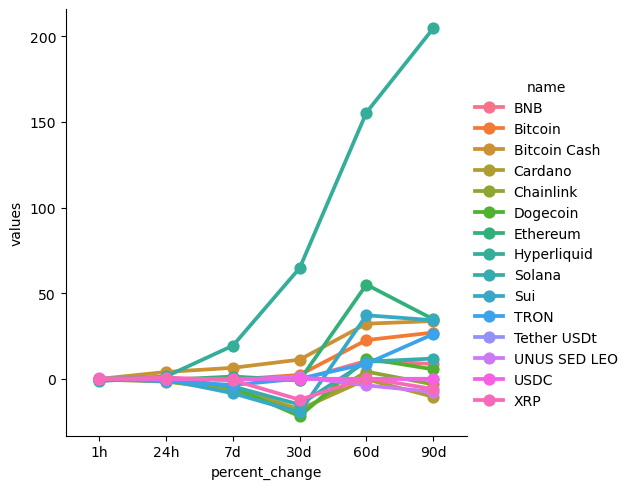

In [45]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [58]:
df9 = df[['name','quote.USD.price','timestamp']]

In [59]:
df9

,name,quote.USD.price,timestamp
0,Bitcoin,104985.83165,2025-06-14 19:23:22.451951
1,Ethereum,2532.22800,2025-06-14 19:23:22.451951
2,Tether USDt,1.00044,2025-06-14 19:23:22.451951
3,XRP,2.16990,2025-06-14 19:23:22.451951
4,BNB,649.99234,2025-06-14 19:23:22.451951
5,Solana,145.51618,2025-06-14 19:23:22.451951
6,USDC,1.00000,2025-06-14 19:23:22.451951
7,Dogecoin,0.17721,2025-06-14 19:23:22.451951
8,TRON,0.26971,2025-06-14 19:23:22.451951
9,Cardano,0.63370,2025-06-14 19:23:22.451951


In [60]:
df10 = df9.query("name=='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,104985.83165,2025-06-14 19:23:22.451951
0,Bitcoin,105045.63263,2025-06-14 19:25:04.075016
0,Bitcoin,105045.63263,2025-06-14 19:25:19.941130
0,Bitcoin,105100.24751,2025-06-14 19:25:35.849989
0,Bitcoin,105100.24751,2025-06-14 19:25:51.784937


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

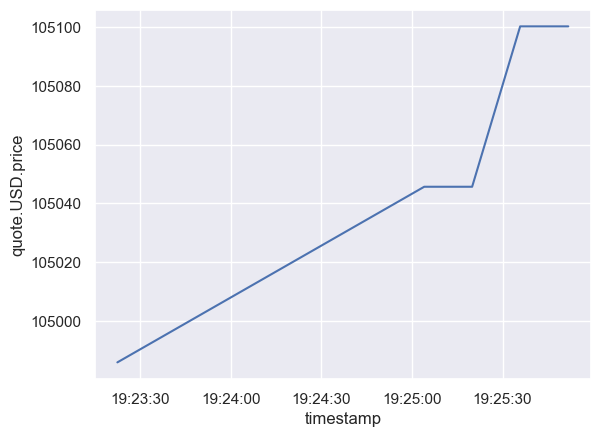

In [61]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)